In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


In [7]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Zip is Extracted")

Zip is Extracted


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
train_ds  = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode ='int',
    batch_size = 32,
    image_size=(256,256)
)

validation_ds  = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode ='int',
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label
  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, kernel_size=(3,3), activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size=(3,3), activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))




In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_ds, epochs=10,validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 105ms/step - loss: 1.3721 - accuracy: 0.5304 - val_loss: 0.6921 - val_accuracy: 0.5094
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.6914 - accuracy: 0.5364 - val_loss: 0.6729 - val_accuracy: 0.5218
Epoch 3/10
625/625 [==============================] - 64s 101ms/step - loss: 0.7174 - accuracy: 0.5542 - val_loss: 0.6687 - val_accuracy: 0.5638
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6459 - accuracy: 0.6080 - val_loss: 0.6155 - val_accuracy: 0.6858
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5959 - accuracy: 0.6773 - val_loss: 0.5572 - val_accuracy: 0.7236
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5720 - accuracy: 0.7046 - val_loss: 0.5921 - val_accuracy: 0.7010
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5498 - accuracy: 0.7230 - val_loss: 0.5283 - val_ac

In [19]:
model.evaluate(train_ds)

625/625 [==============================] - 32s 50ms/step - loss: 0.6254 - accuracy: 0.6615


[0.6253547072410583, 0.6614999771118164]

In [24]:
import cv2
import matplotlib.pyplot as plt

In [27]:
img_path = cv2.imread('/content/train/cats/cat.10002.jpg')

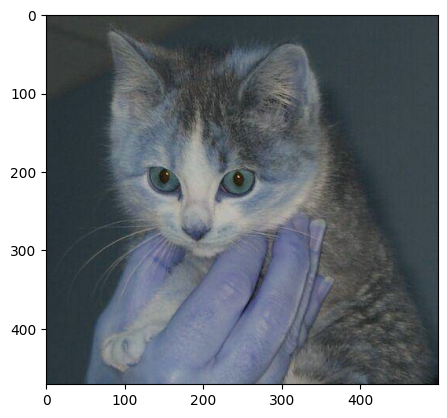

In [28]:
plt.imshow(img_path)

In [29]:
img_path.shape

(471, 499, 3)

In [31]:
img_path = cv2.resize(img_path,(256,256))

In [32]:
test_image  =img_path.reshape((1,256,256,3))

In [33]:
model.predict(test_image)

1/1 [==============================] - 0s 394ms/step


array([[0.27388275]], dtype=float32)